### Student Information
Name:張楚翎

Student ID:109065508

GitHub ID:lilian5319229

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

# 1: Take home exercise

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import seaborn as sns
import plotly.express as px
import nltk
import helpers.data_mining_helpers as dmh

import os
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
%matplotlib inline

In [2]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [3]:
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: twenty_train.target_names[t])
X[0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 
### Answer

In [4]:
#Answer here
X.loc[::10, ['text', 'category_name']][0:10]

,text,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,comp.graphics
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,soc.religion.christian
20,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...,soc.religion.christian
30,From: vgwlu@dunsell.calgary.chevron.com (greg ...,sci.med
40,From: david-s@hsr.no (David A. Sjoen) Subject:...,soc.religion.christian
50,From: ab@nova.cc.purdue.edu (Allen B) Subject:...,comp.graphics
60,From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...,alt.atheism
70,From: weaver@chdasic.sps.mot.com (Dave Weaver)...,soc.religion.christian
80,From: annick@cortex.physiol.su.oz.au (Annick A...,sci.med
90,Subject: Vonnegut/atheism From: dmn@kepler.unh...,alt.atheism


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?
### Answer

In [5]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [6]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

The reason why .isnull() didn't work is because it the function can't take the values like NA values,None or numpy.NaN, so it mapped to True values.
And for the id with 'C','D' and 'F',characters such as '', 'NaN' or 'None' are string that considered as a False value. 

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.
### Answer

It should be change to the X_sample dataframe.The records in X_sample dataframe are not in the original order.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 
### Answer

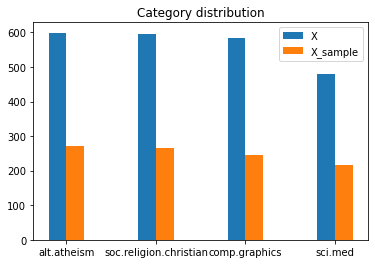

In [7]:
# Answer here
X_sample = X.sample(n=1000) #random state
width = 0.2
length=len(categories)
index = np.arange(length)

plt.bar(index , X.category_name.value_counts(), width, label='X')
plt.bar(index + 0.2, X_sample.category_name.value_counts(), width, label='X_sample')

plt.title('Category distribution')
plt.xticks(index+width/2,categories)

plt.legend()
plt.show()


In [8]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
#analyze = count_vect.build_analyzer()

In [9]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.
### Answer

In [10]:
# Answer here
ans=X_counts[4, 0:100].toarray()
flatt_ans=ans.flatten()
count=0
for i in flatt_ans:
    if i==1 and count!=0: 
        print(count_vect.get_feature_names()[count])
    count=count+1

01


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization
### Answer

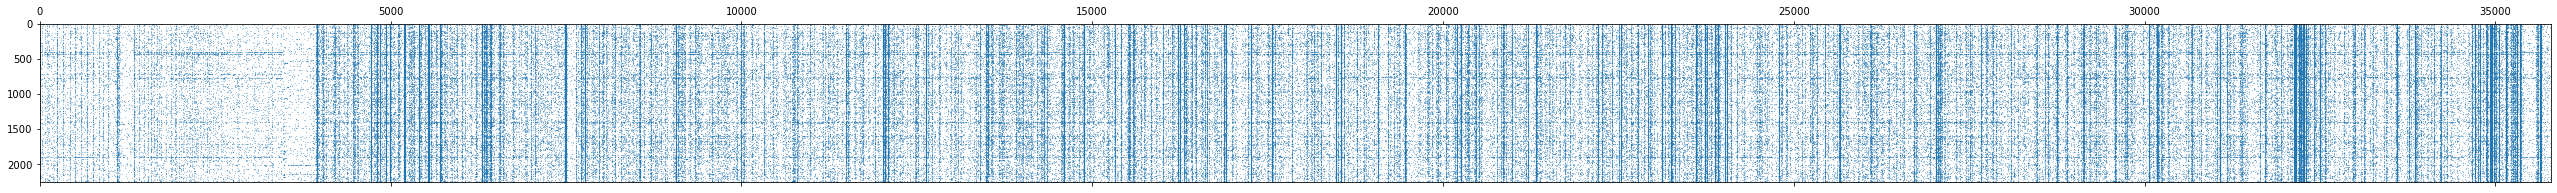

In [11]:
# Answer here
plt.subplots(figsize=(45, 40))

# plot for all the terms
plt.spy(X_counts[:, :40000], precision=0, markersize=0.1)

plt.show()

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.
### Answer

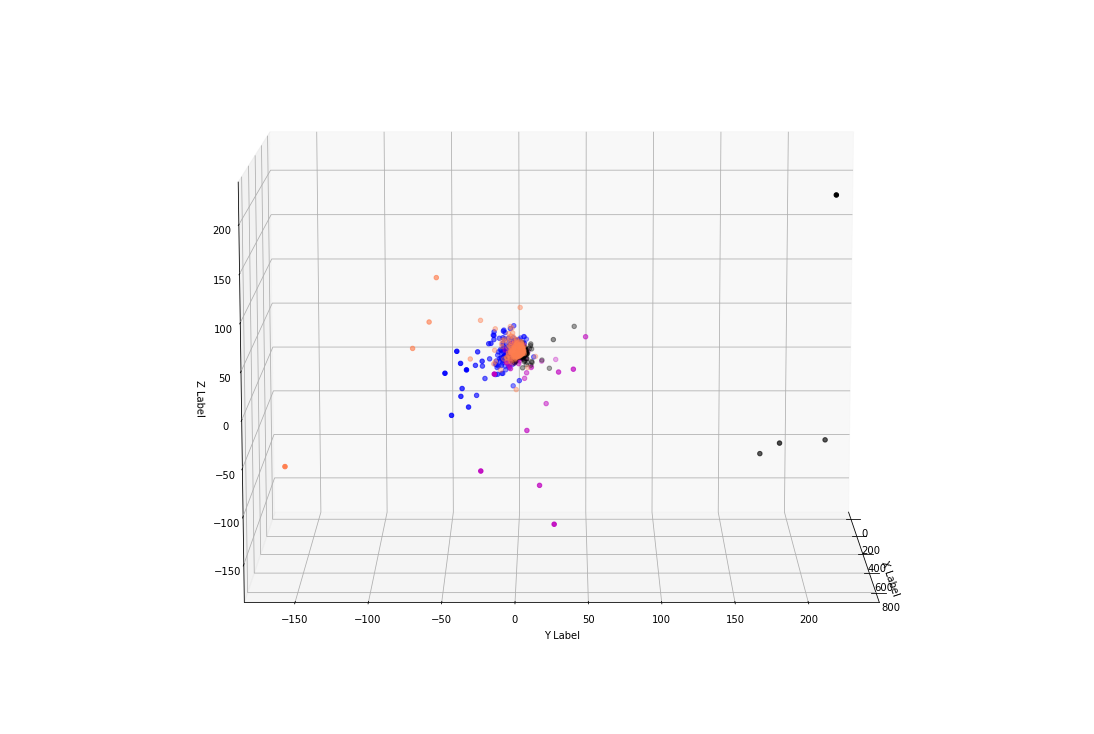

In [12]:
# Answer here
X_reduced3 = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'm']


fig = plt.figure(figsize = (15,10))
ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced3[X['category_name'] == category].T[0]
    ys = X_reduced3[X['category_name'] == category].T[1]
    zs = X_reduced3[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

#first angle
ax.view_init(10, 0)
plt.show()



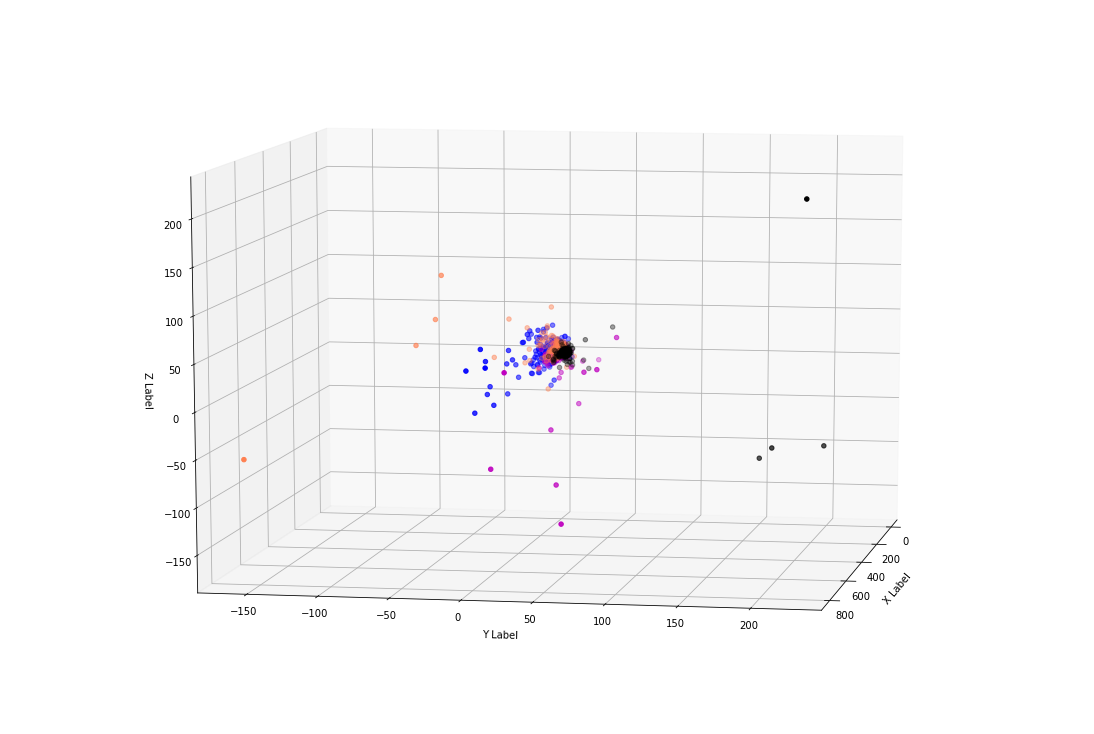

In [13]:
fig = plt.figure(figsize = (15,10))
ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced3[X['category_name'] == category].T[0]
    ys = X_reduced3[X['category_name'] == category].T[1]
    zs = X_reduced3[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

#first angle
ax.view_init(10, 10)
plt.show()

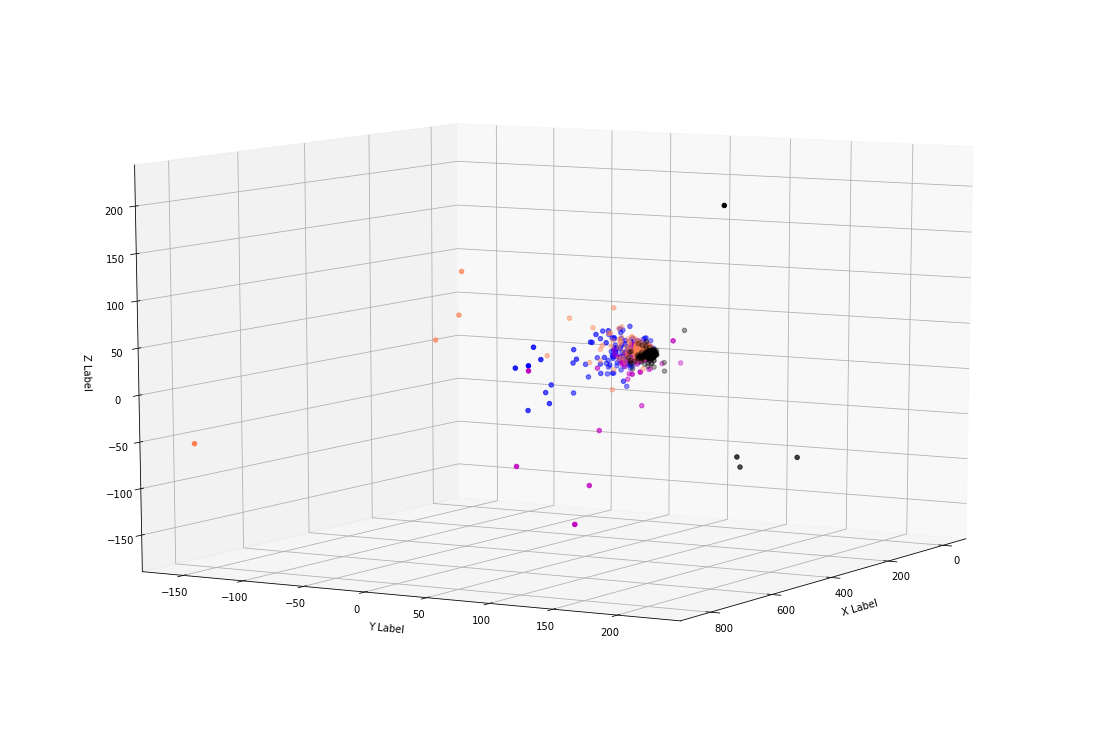

In [14]:
fig = plt.figure(figsize = (15,10))
ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced3[X['category_name'] == category].T[0]
    ys = X_reduced3[X['category_name'] == category].T[1]
    zs = X_reduced3[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

#first angle
ax.view_init(10, 30)
plt.show()

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.
### Answer

In [15]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

35788


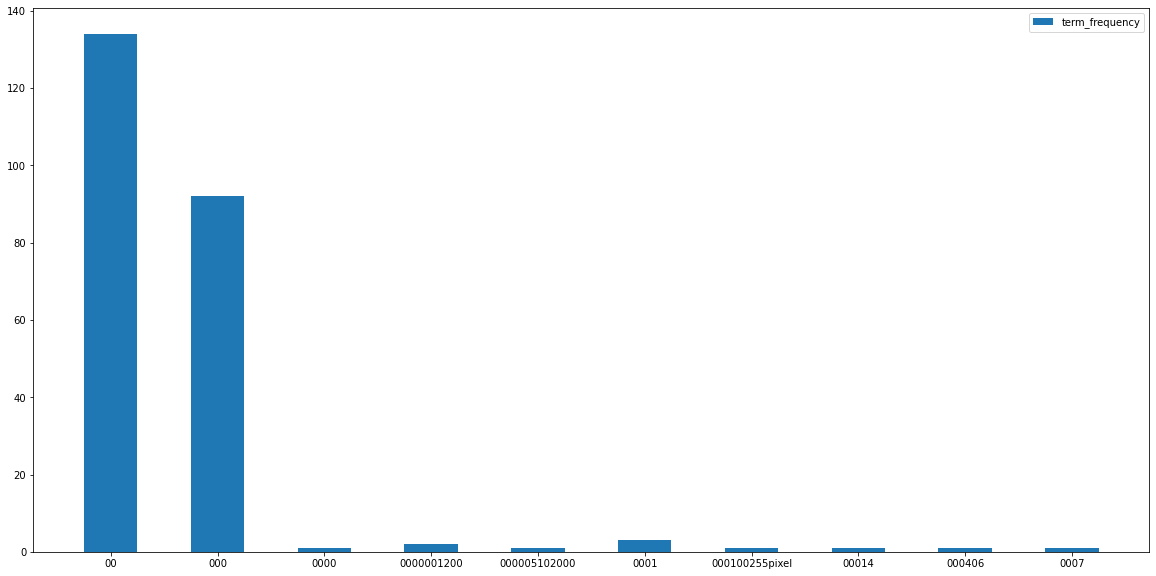

In [16]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
print(len(term_frequencies))
width = 0.5
plt.figure(figsize = (20,10))
fig = plt.bar(count_vect.get_feature_names()[:10], term_frequencies[:10],0.5,label='term_frequency')
plt.legend(loc=1)
plt.show()

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 
### Answer

In [17]:
# Answer here
new_frequencies=[]
for i in term_frequencies:
    if i>100:
        new_frequencies.append(i)
print(new_frequencies)   


[134, 378, 105, 215, 236, 219, 239, 293, 278, 192, 184, 208, 488, 324, 192, 142, 136, 268, 116, 123, 101, 167, 104, 101, 210, 109, 124, 108, 161, 226, 2148, 248, 137, 303, 183, 130, 129, 121, 279, 148, 105, 489, 315, 213, 105, 154, 208, 104, 147, 2093, 147, 114, 146, 1090, 147, 164, 252, 852, 199, 2393, 113, 13017, 145, 105, 403, 251, 104, 121, 1669, 131, 557, 366, 127, 106, 335, 123, 4769, 112, 106, 287, 104, 246, 1453, 4015, 232, 126, 138, 2191, 326, 214, 387, 171, 257, 146, 339, 199, 347, 213, 275, 286, 116, 4898, 952, 170, 1068, 420, 719, 255, 156, 803, 131, 289, 344, 322, 541, 101, 128, 119, 327, 110, 154, 251, 362, 172, 403, 109, 101, 3453, 2548, 492, 151, 194, 294, 255, 142, 2818, 103, 155, 122, 313, 148, 372, 125, 174, 262, 103, 278, 105, 235, 203, 228, 161, 120, 102, 170, 103, 390, 546, 289, 495, 472, 274, 127, 182, 116, 103, 201, 205, 123, 247, 2172, 384, 159, 112, 165, 126, 448, 117, 146, 110, 133, 140, 172, 754, 136, 366, 104, 121, 729, 163, 129, 306, 333, 415, 169, 219, 12

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

['íålittin', 'ªl', 'zzz', 'zz', 'zyxel', 'zyklon', 'zyeh', 'zwart', 'zvonko', 'zvi', 'zus', 'zurlo', 'zurich', 'zur', 'zumder', 'zug', 'zues', 'zubkoff', 'zt', 'zsoft', 'zrz', 'zorn', 'zorg', 'zorasterism', 'zopfi', 'zooms', 'zooming', 'zoom', 'zool', 'zooid', 'zoo', 'zonker', 'zone', 'zonal', 'zombie', 'zoloft', 'zolft', 'zolf', 'zola', 'zoerasterism', 'zmodem', 'zlumber', 'zisfein', 'zirkel', 'zippy', 'zipped', 'zip', 'zionist', 'zion', 'zinc', 'zimmerman', 'zillions', 'zilch', 'zikopoulos', 'ziedman', 'zhou', 'zhenghao', 'zhao', 'zhang', 'zeus', 'zeta', 'zeroed', 'zero_', 'zero', 'zerfall', 'zeppelin', 'zephyr', 'zentrum', 'zeno', 'zenkar', 'zenith', 'zen', 'zemcik', 'zeke', 'zeitschrift', 'zeitgeist', 'zeit', 'zechariah', 'zech', 'zebras', 'zebedee', 'zealous', 'zealand', 'zeal', 'zcomm', 'zcat', 'zc', 'zbuffering', 'zazen', 'zation', 'zara', 'zaphod', 'zamenhof', 'zalan', 'zakat', 'zakariyah', 'zach', 'zabriskie', 'zabolotzky', 'za']


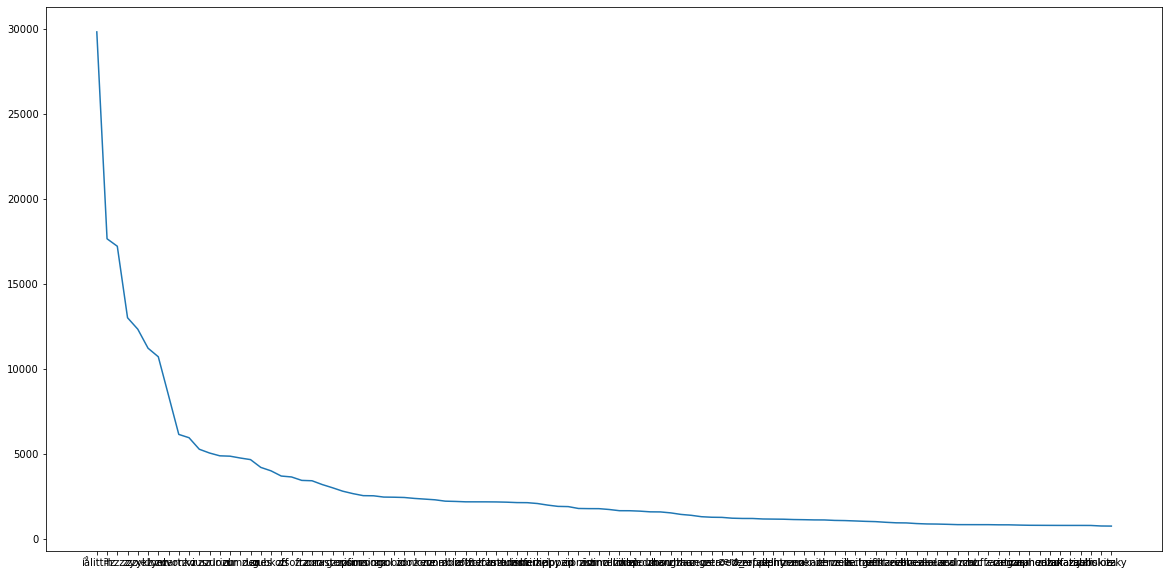

In [18]:
# Answer here
plt.figure(figsize = (20,10))
#sorted in descending order
descending_order = np.sort(term_frequencies)[::-1]
top_term = []
count_vect.get_feature_names()
for i in np.argsort(count_vect.get_feature_names())[::-1][:100]:
    top_term.append(count_vect.get_feature_names()[i])
print(top_term)    
plt.plot(top_term, descending_order[:100])
plt.show()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?
### Answer
Yes.

In [19]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
mlb.classes_

X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


# 2.
# Follow the same process  on the new dataset

In [20]:
dir_data = 'labelled text'
#combine the filename with the root directory
imdb_label = os.path.join(dir_data, 'imdb_labelled.txt')
amazon_label = os.path.join(dir_data, 'amazon_cells_labelled.txt')
yelp_label = os.path.join(dir_data, 'yelp_labelled.txt')

# read file & convert into dataframe
def readfile_convert_dataframe(file_name):
    f=open(file_name,'r',encoding="utf-8")
    lines = f.readlines()
    sentence = []
    label = []
    for i in lines:
        split = i.split('\t')
        sentence.append(split[0])
        label.append(split[1].rstrip())
    dataframe=pd.DataFrame(sentence,columns=['Sentence'])
    dataframe['Label']=label
    return dataframe

imdb_df=readfile_convert_dataframe(imdb_label)
amazon_df=readfile_convert_dataframe(amazon_label)
yelp_df=readfile_convert_dataframe(yelp_label)
#check the lengths of each dataframe
print(len(imdb_df))
print(len(amazon_df))
print(len(yelp_df))
#concat three dataframes
X_ND = pd.concat([imdb_df, amazon_df, yelp_df])
print(len(X_ND))
X_ND[990:1010]

1000
1000
1000
3000


,Sentence,Label
990,"The opening sequence of this gem is a classic,...",1
991,Fans of the genre will be in heaven.,1
992,Lange had become a great actress.,1
993,It looked like a wonderful story.,1
994,I never walked out of a movie faster.,0
995,I just got bored watching Jessice Lange take h...,0
996,"Unfortunately, any virtue in this film's produ...",0
997,"In a word, it is embarrassing.",0
998,Exceptionally bad!,0
999,All in all its an insult to one's intelligence...,0


In [21]:
X_ND.iloc[::10,0:1][0:10]

,Sentence
0,"A very, very, very slow-moving, aimless movie ..."
10,And those baby owls were adorable.
20,I can think of no other film where something v...
30,"There are massive levels, massive unlockable c..."
40,The very idea of it was lame - take a minor ch...
50,I'm glad the film didn't go for the most obvio...
60,I sat riveted to the TV screen.
70,"And, quite honestly, often its not very good."
80,I'm glad this pretentious piece of s*** didn't...
90,Definitely worth checking out.


In [22]:
X_ND.isnull()

,Sentence,Label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
995,False,False
996,False,False
997,False,False
998,False,False


In [23]:
#Check is there any null data
X_ND.isnull().apply(lambda x: dmh.check_missing_values(x))

Sentence    (The amoung of missing records is: , 0)
Label       (The amoung of missing records is: , 0)
dtype: object

## 2.1 Dealing with Duplicate Data

In [24]:
sum(X_ND.duplicated())

17

In [25]:
X_ND.drop_duplicates(subset='Sentence', inplace=True)
len(X_ND)

2983

## 2.2 Sampling

In [26]:
X_ND_sample = X_ND.sample(n=1000)

In [27]:
X_ND_sample[0:4]

,Sentence,Label
488,I particularly remember my senses being assaul...,0
896,The pizza selections are good.,1
649,We won't be going back anytime soon!,0
364,It definitely was not as good as my S11.,1


Because this kind of data are not classification problems, so we don't need to draw the bar chart.

In [28]:
count_vect1 = CountVectorizer()
X_counts1 = count_vect1.fit_transform(X_ND.Sentence)

In [29]:
X_counts1.shape

(2983, 5155)

In [30]:
count_vect1.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [31]:
X_counts1[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [32]:
plot_x = ["term_"+str(i) for i in count_vect1.get_feature_names()[0:100]]

In [33]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980',
 'term_1986',
 'term_1995',
 'term_1998',
 'term_20',
 'term_2000',
 'term_2005',
 'term_2006',
 'term_2007',
 'term_20th',
 'term_2160',
 'term_23',
 'term_24',
 'term_25',
 'term_2mp',
 'term_30',
 'term_30s',
 'term_325',
 'term_35',
 'term_350',
 'term_375',
 'term_3o',
 'term_40',
 'term_40min',
 'term_42',
 'term_44',
 'term_45',
 'term_4s',
 'term_4ths',
 'term_50',
 'term_5020',
 'term_510',
 'term_5320',
 'term_54',
 'term_5lb',
 'term_680',
 'term_70',
 'term_70000',
 'term_700w',
 'term_70s',
 'term_80',
 'term_80s',
 'term_8125',
 'term_85',
 'term_8525',
 'term_8530',
 'term_8pm',
 'term_90',
 'term_95',
 'term_99',
 'term_aailiyah',
 'term_abandoned',
 'term_abhor',
 'term_ability',
 'term_able',
 'term_abound',
 '

In [34]:
plot_y = ["doc_"+ str(i) for i in list(X_ND.index)[0:10]]
print(plot_y)

['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9']


In [35]:
plot_z = X_counts1[0:10, 0:100].toarray()
print(plot_z)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 

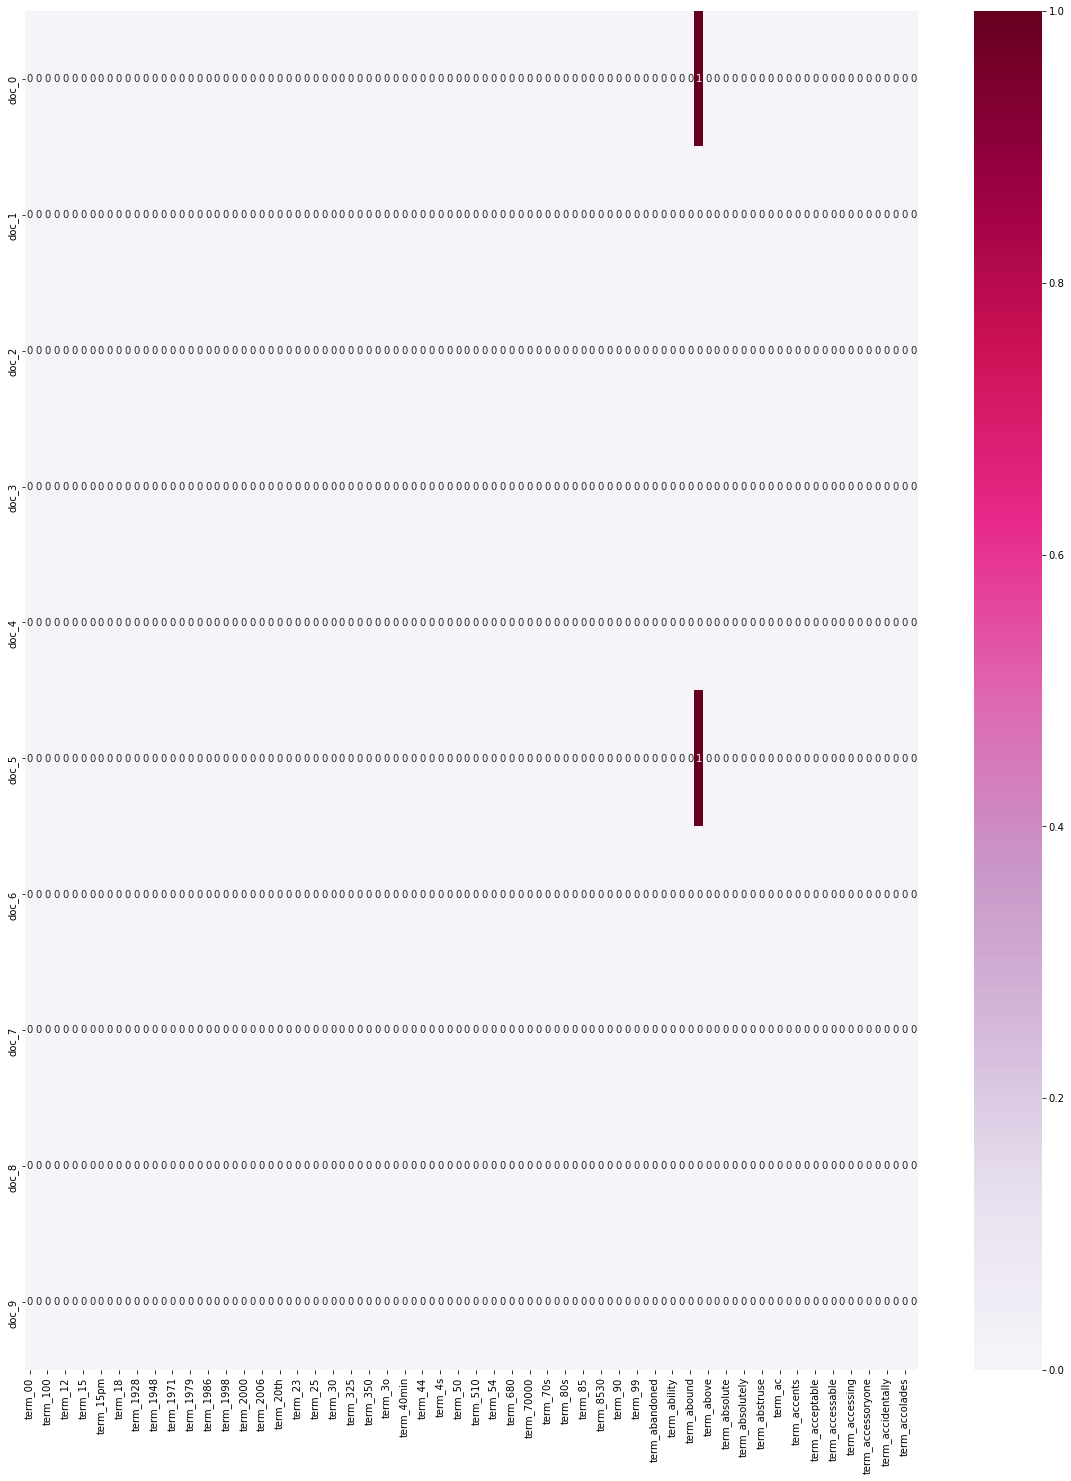

In [36]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(20, 25))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

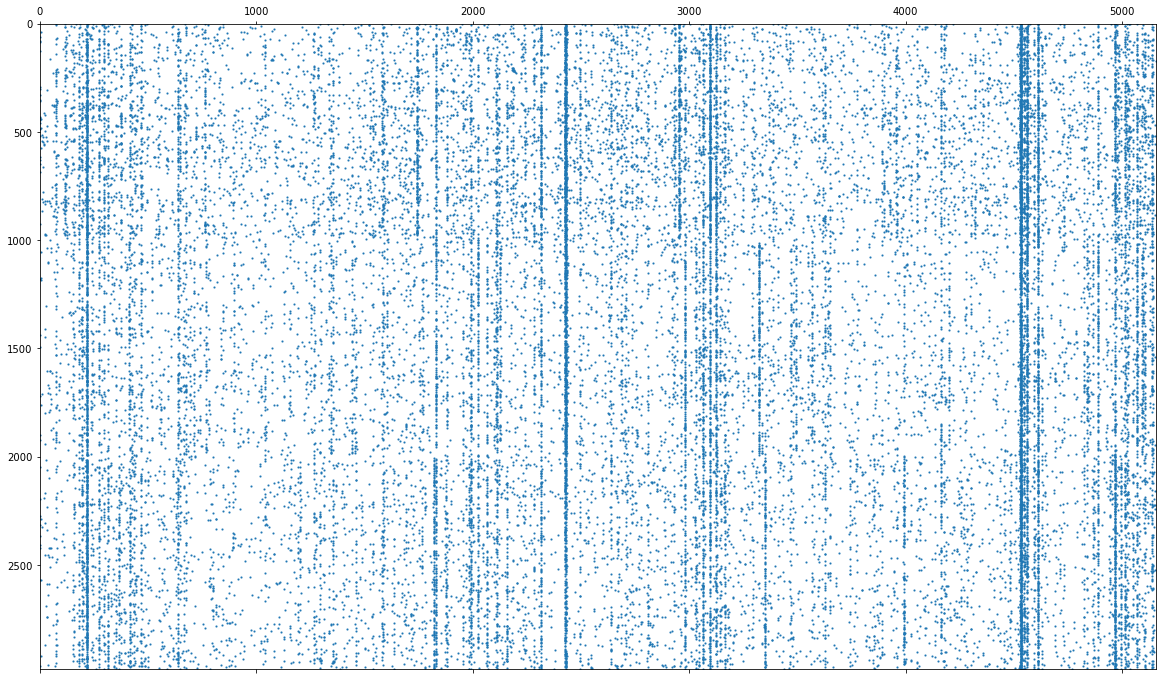

In [37]:
plt.subplots(figsize=(20, 25))
plt.spy(X_counts1, precision=0, markersize=1)

##  2.3 Atrribute Transformation / Aggregation

In [38]:
term_frequencies_ND = []
for j in range(0,X_counts1.shape[1]):
    term_frequencies_ND.append(sum(X_counts1[:,j].toarray()))

In [39]:
term_frequencies_ND = np.asarray(X_counts1.sum(axis=0))[0]
print(term_frequencies_ND)

[ 1 36  3 ...  1  2  1]


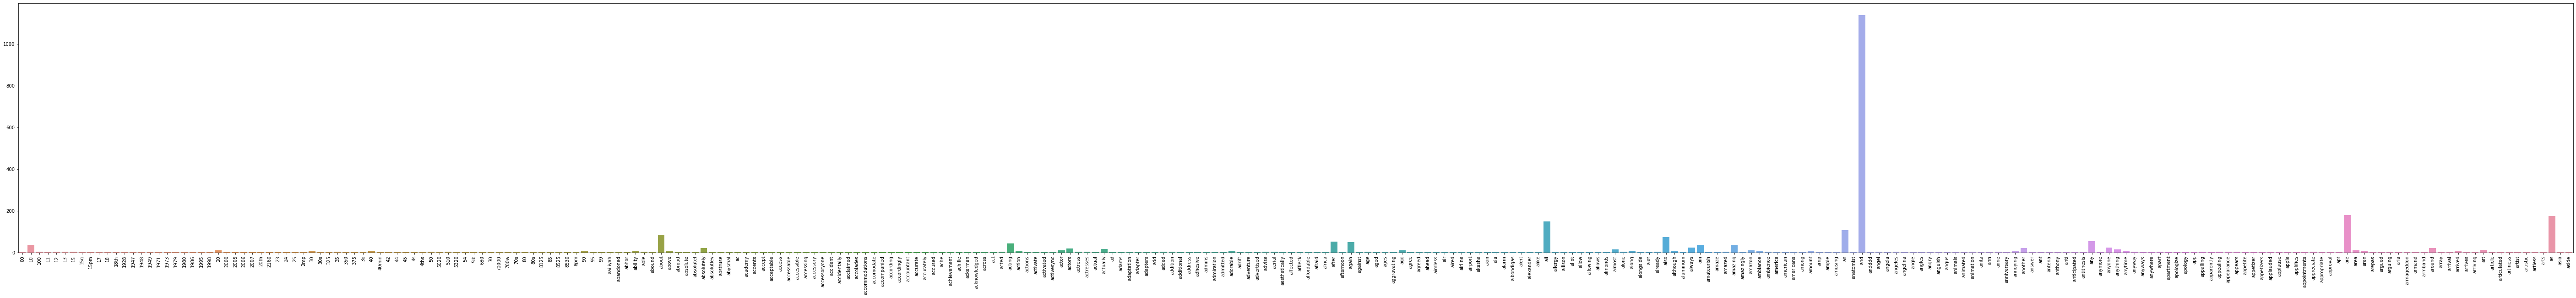

In [40]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect1.get_feature_names()[:300], 
            y=term_frequencies_ND[:300])
g.set_xticklabels(count_vect1.get_feature_names()[:300], rotation = 90);

# 3.
# Generate meaningful new data visualizations & TF-IDF features from the tokens of each text

1490
1493


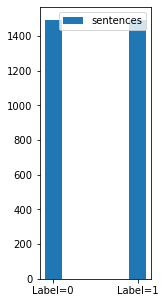

In [41]:
#calculate number of sentences of both the positive and nagitive values
sum_positive=sum(X_ND['Label'] == '1')
print(sum_positive)
sum_negitive=sum(X_ND['Label'] == '0')
print(sum_negitive)
sentences=[]
sentences.append(sum_positive)
sentences.append(sum_negitive)
#plot the chart 
plt.figure(figsize = (2,5))
x_axis=['Label=0','Label=1']
fig = plt.bar(x_axis, sentences,0.2,label='sentences')
plt.legend(loc=1)
plt.show()

**We can find out that there are 1490 sentences in label 1, and 1493 sentences in label 2.
  So the data is balance in this dataset.

In [42]:
#calculate the frequency of each words where the label is '1'(positive)
positive_term_frequencies = X_counts1[(X_ND['Label'] == '1').values].toarray().sum(axis=0)
print(positive_term_frequencies)

[ 0 23  2 ...  0  0  0]


4531
216
2427
2432
4558
3097
4609
4968
2314
2023
['the', 'and', 'is', 'it', 'this', 'of', 'to', 'was', 'in', 'great']
[995 674 416 382 326 310 307 257 206 195]


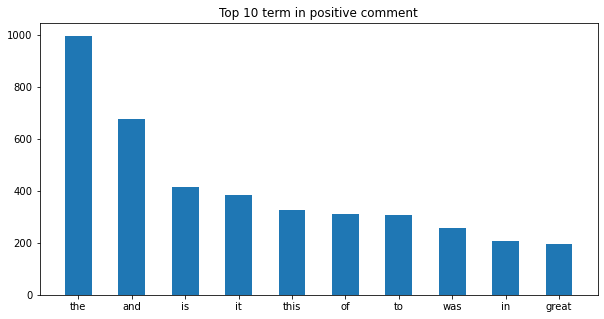

In [43]:
N = 10
index = np.arange(N)

positive_top_term = []
for i in np.argsort(positive_term_frequencies)[::-1][:N]:
    print(i)
    positive_top_term.append(count_vect1.get_feature_names()[i])
y = np.sort(positive_term_frequencies)[::-1][:N]
print(positive_top_term)
print(y)
fig = plt.figure(figsize=(10, 5))

plt.title('Top 10 term in positive comment')
fig = plt.bar(positive_top_term,y, 0.5)

plt.show()

In [44]:
tfidf_vect_p2 = TfidfVectorizer()
data_tfidf = tfidf_vect_p2.fit_transform(X_ND.Sentence)
data=data_tfidf.toarray()
df_tfidf=pd.DataFrame(data,columns=count_vect1.get_feature_names())
print(df_tfidf)

       00   10  100   11   12   13   15  15g  15pm   17  ...  yucky  yukon  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...    ...   
2978  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2979  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2980  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2981  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2982  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   

      yum  yummy  yun  z500a  zero  zillion  zombie  zombiez  


In [45]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [46]:
# Use tfidf features to build classifiers.

x = data_tfidf
y = X_ND['Label']
    
mnb = MultinomialNB()
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

cross_val_score(mnb, x, y, scoring='accuracy', cv=10).mean()

0.821667302641916

In [47]:
#Use word-frequency to build classifiers.
x = X_counts1
y = X_ND['Label']
    
mnb = MultinomialNB()
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

cross_val_score(mnb, x, y, scoring='accuracy', cv=10).mean()

0.8196527575138605

### Comment on the differences

The value score is nearly the same  between "tfidf features" and "word frequency features" classifiers.

# 4. 
# How can you improve the Data preprocessing for these specific datasets? 

When we do the first part of the homework, we calculate the term frequencies by using the sum function which the python build,
"for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))"
but then, I found that there is a method that is faster then using the sum function which the python build,
and that is, numpy.sum. 